In [1]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
(homes :=
 pl.read_csv('data/Saratoga_NY_Homes.csv')
 .with_columns(
     pl.col('Waterfront').cast(pl.String()),
     pl.col('New.Construct').cast(pl.String()),
     pl.col('Central.Air').cast(pl.String()),
     pl.col('Fuel.Type').cast(pl.String()),
     pl.col('Heat.Type').cast(pl.String()),
     pl.col('Sewer.Type').cast(pl.String()),
 )
)

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,str,i64,i64,str,str,str,str,str,i64,i64,i64,i64,f64,i64,i64
132500,0.09,"""0""",42,50000,"""0""","""0""","""3""","""4""","""2""",906,35,2,1,1.0,5,1
181115,0.92,"""0""",0,22300,"""0""","""0""","""2""","""3""","""2""",1953,51,3,0,2.5,6,0
109000,0.19,"""0""",133,7300,"""0""","""0""","""2""","""3""","""3""",1944,51,4,1,1.0,8,1
155000,0.41,"""0""",13,18700,"""0""","""0""","""2""","""2""","""2""",1944,51,3,1,1.5,5,1
86060,0.11,"""0""",0,15000,"""1""","""1""","""2""","""2""","""3""",840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,"""0""",32,24200,"""0""","""0""","""2""","""3""","""3""",2310,61,5,1,2.5,11,1
285000,0.94,"""0""",37,36200,"""0""","""0""","""2""","""3""","""3""",2564,61,4,1,2.5,11,1
194900,0.39,"""0""",9,20400,"""0""","""0""","""2""","""2""","""3""",1099,51,2,0,1.0,3,0


In [58]:
(cat_predictors :=
 homes
 .select(cs.by_name('Price') | cs.string())
 .unpivot(cs.string(),
          index = 'Price',
          variable_name = 'predictor',
          value_name = 'label')
 .to_pandas()
)

,Price,predictor,label
0,132500,Waterfront,0
1,181115,Waterfront,0
2,109000,Waterfront,0
3,155000,Waterfront,0
4,86060,Waterfront,0
...,...,...,...
10363,289000,Sewer.Type,3
10364,285000,Sewer.Type,3
10365,194900,Sewer.Type,3
10366,125000,Sewer.Type,3


**DO THIS PLOT BUT WITH ALL THE VARIABLES!!! NO COLORED GRAPHS**

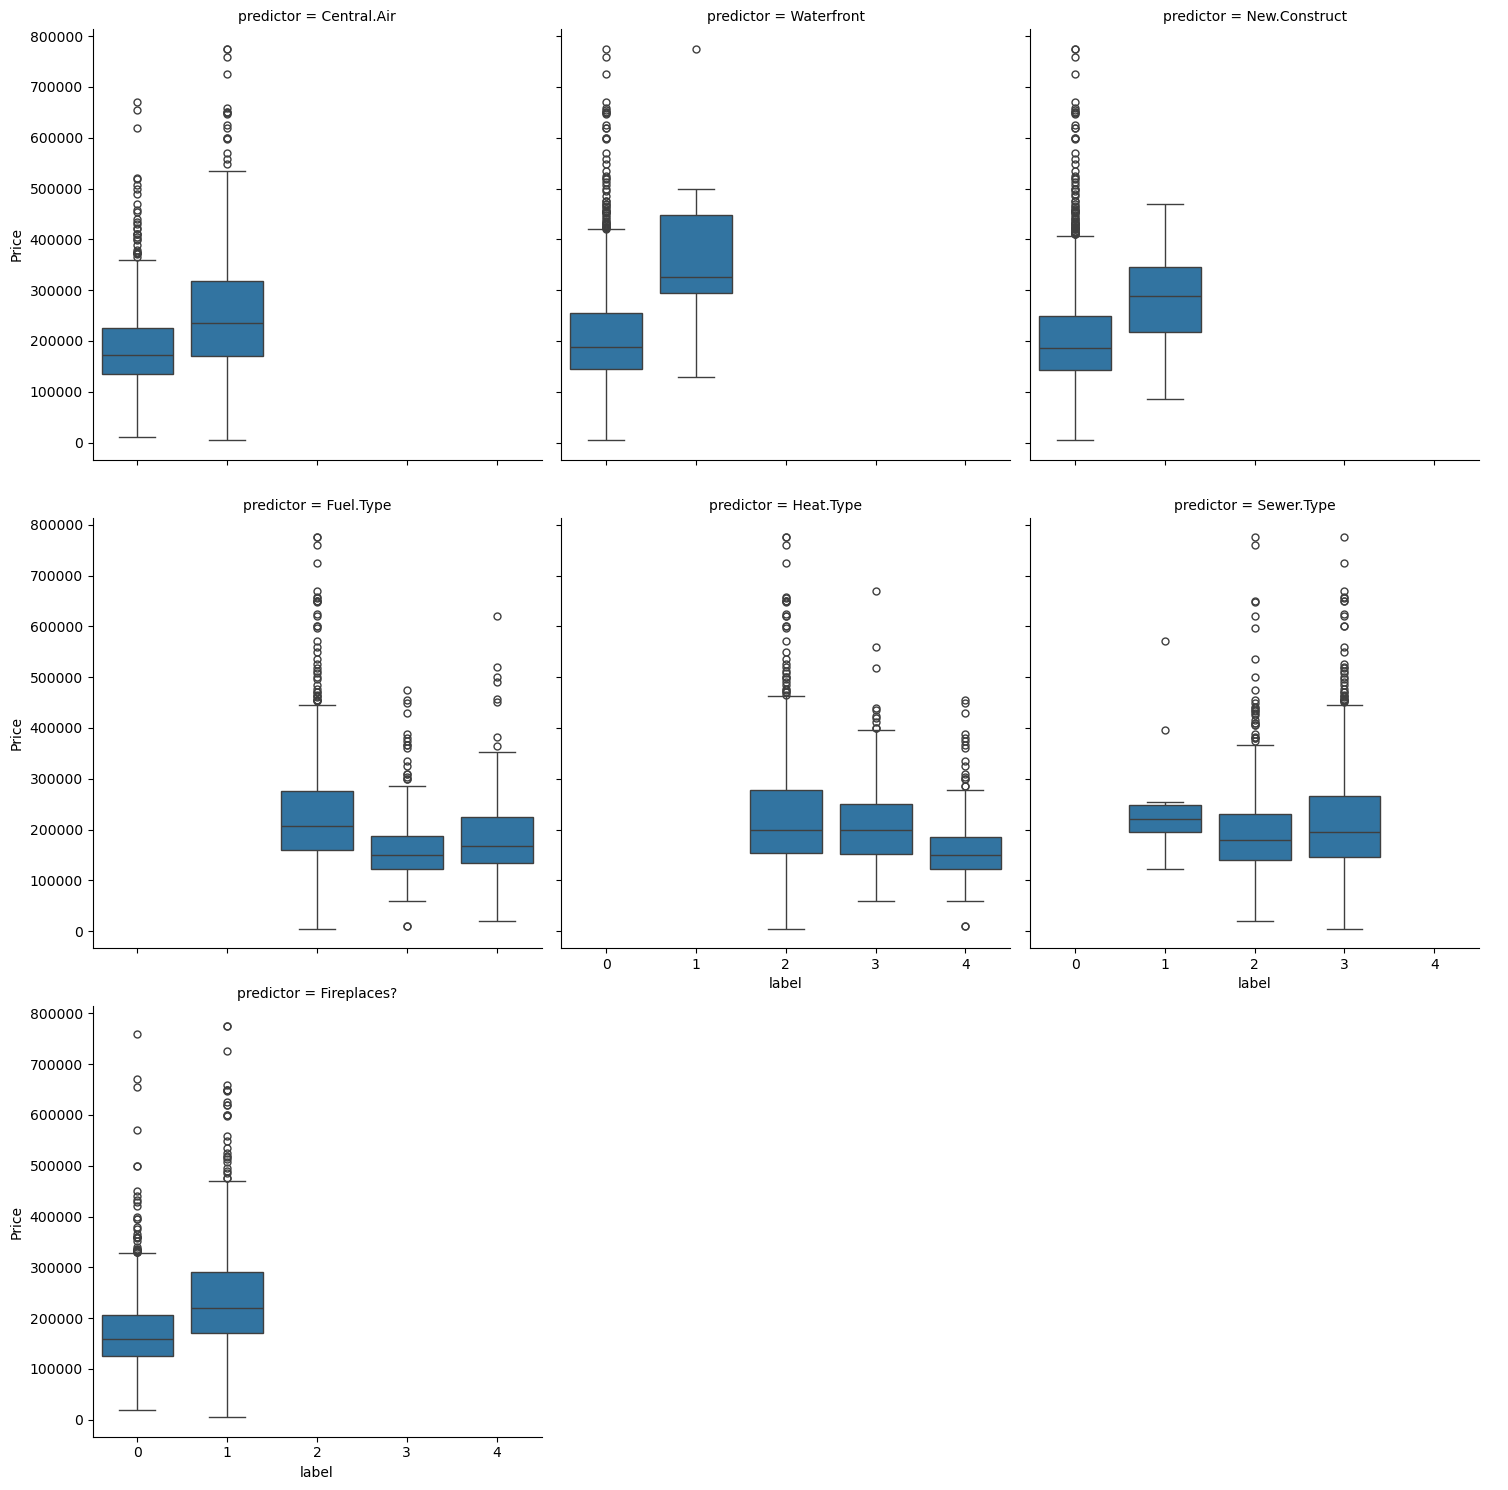

In [56]:
sns.catplot(
    data=cat_predictors, 
    x='label', 
    y='Price', 
    col='predictor', 
    kind='box', 
    col_wrap=3,
)
plt.show()

**Summary:**
Homes with more desirable features consistently have higher median prices and a greater concentration of high price outliers, indicating substantial premiums for these features. Waterfront homes exhibit the largest seperation in price distributions and the greatest variability, showing a strong premium. New construction, central air, and fireplaces are also associated with higher prices, while differences across fuel, heat, and sewer types suggest underlying variation in home quality or location.

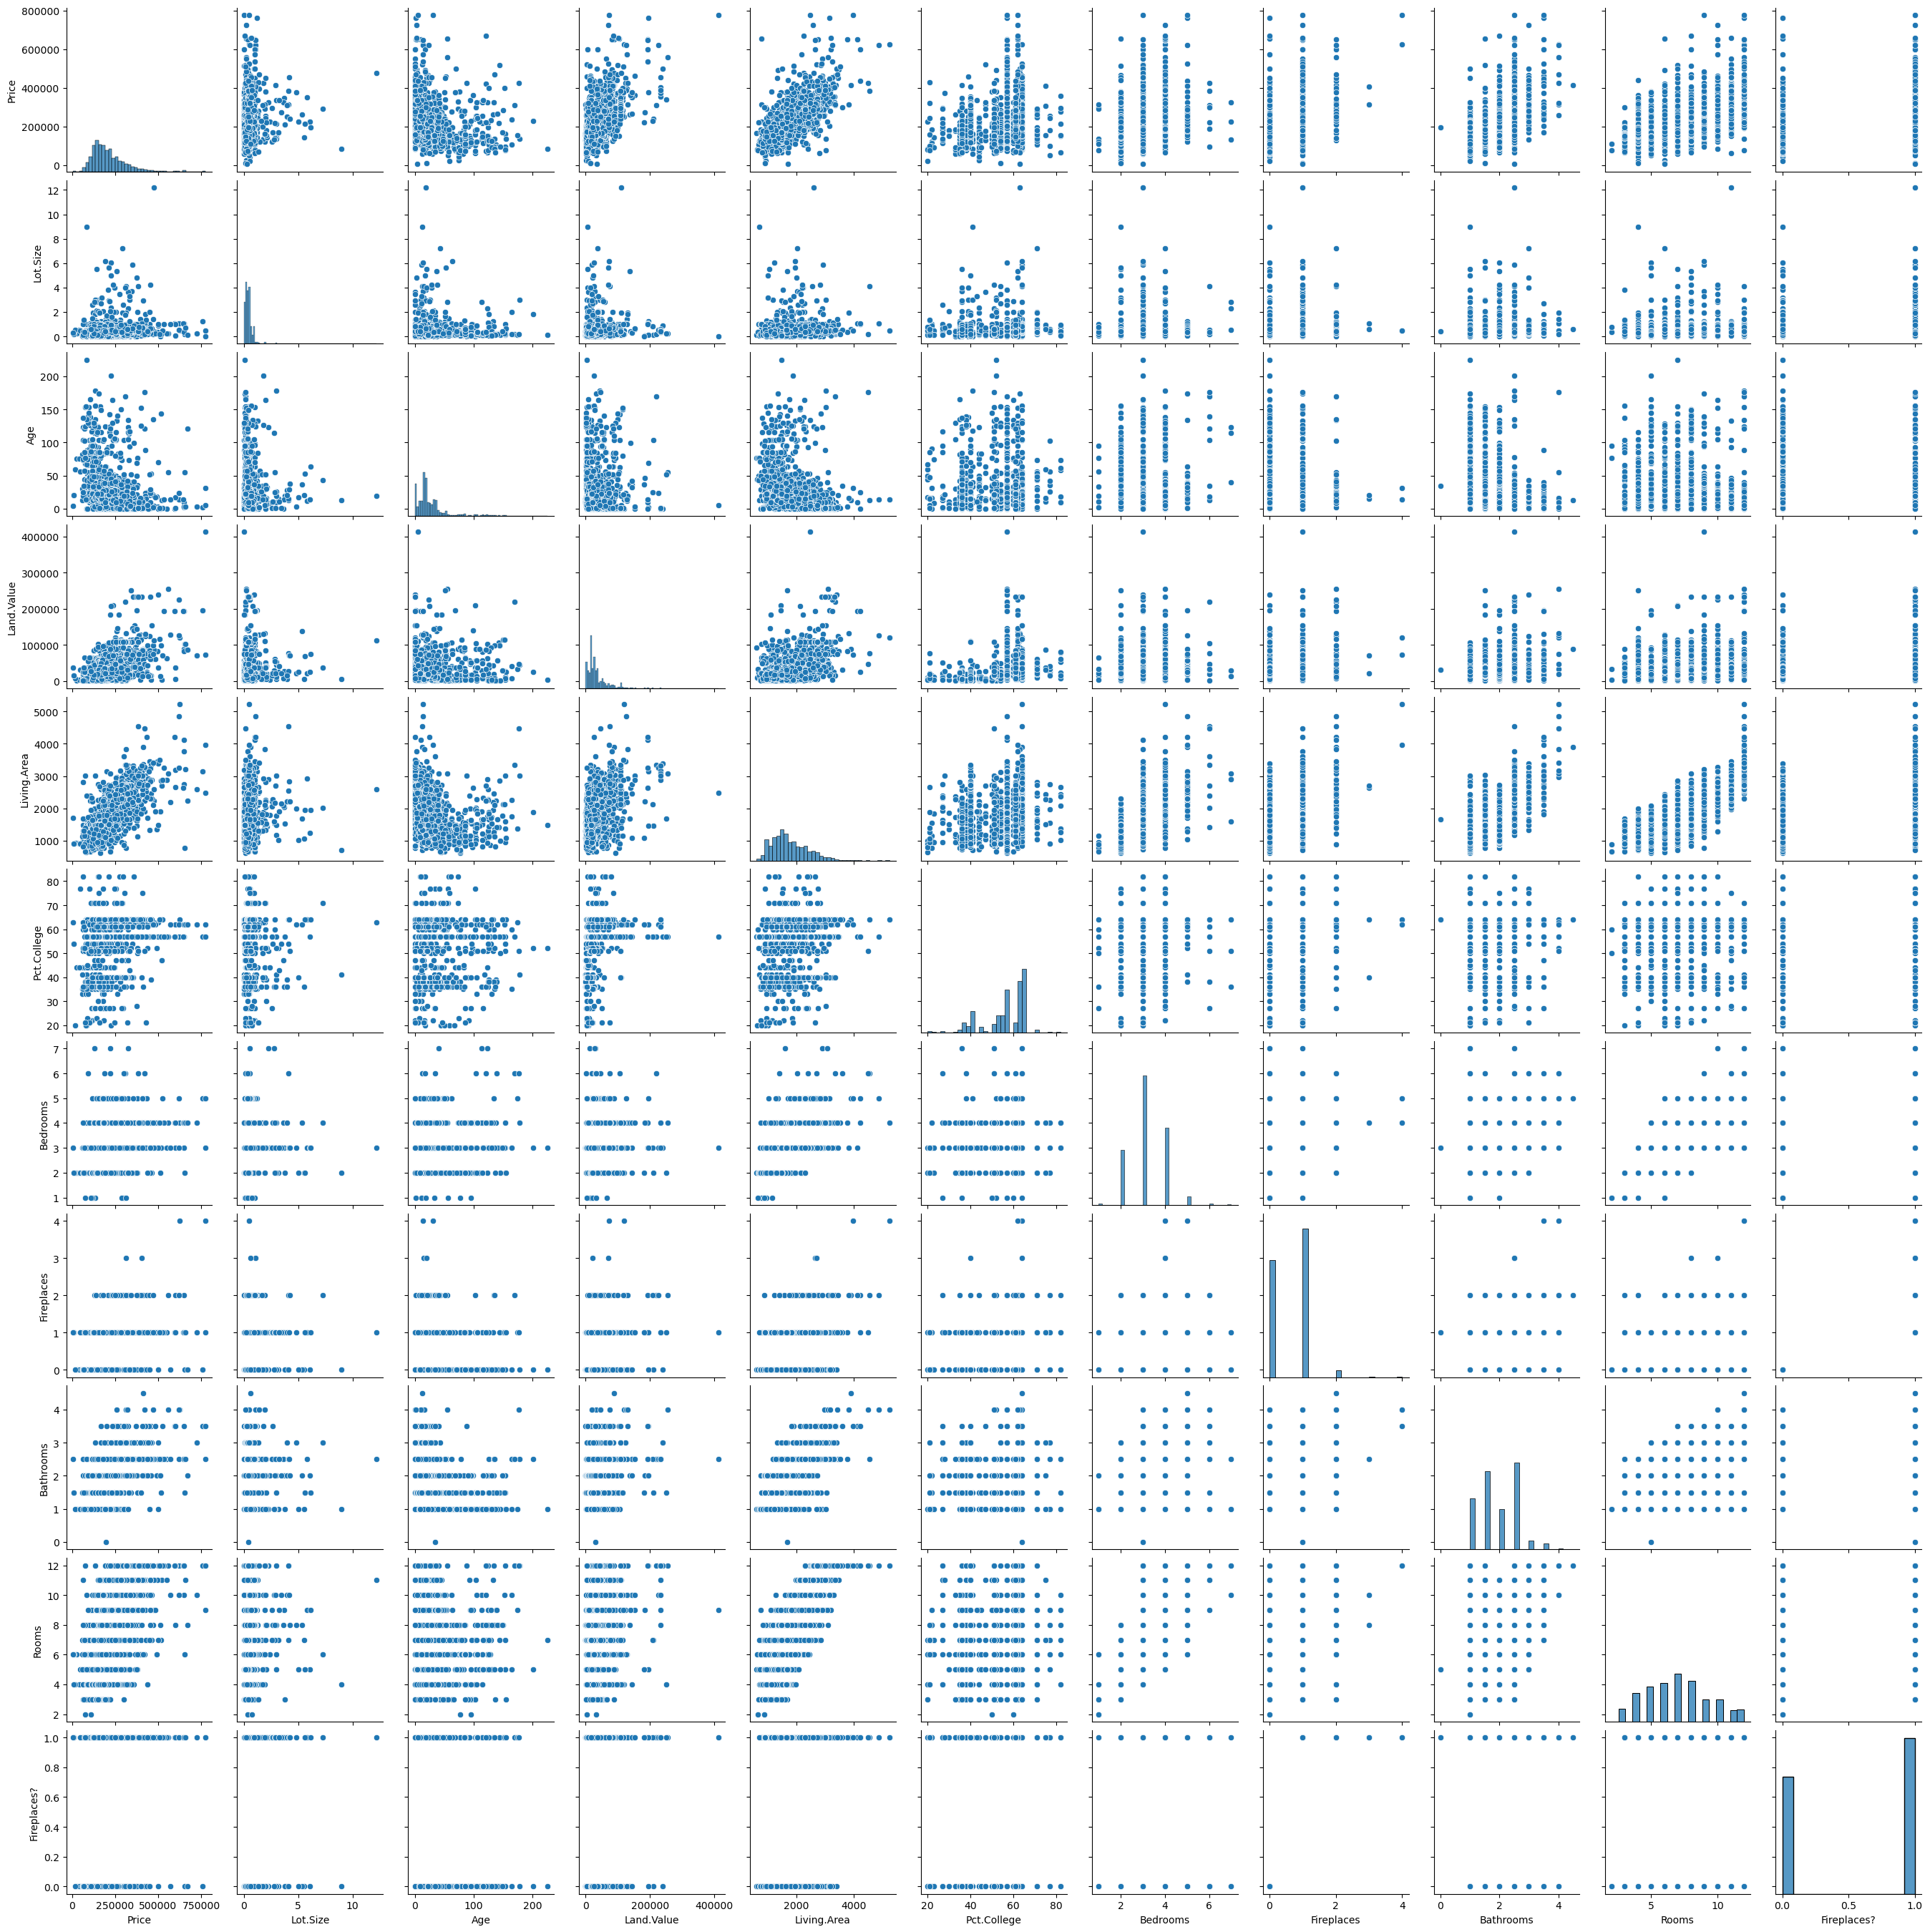

In [59]:
sns.pairplot(homes.to_pandas())

**Summary:**
Price is heavily right skewed with several extreme outliers. living area and land value show the strongest positive associations with price, while age shows a negative relationship. Discrete variables such as bedrooms, bathrooms, and rooms display stepwise increases in price rather than smooth trends. Other numerical relationships apper weaker or more dispersed.

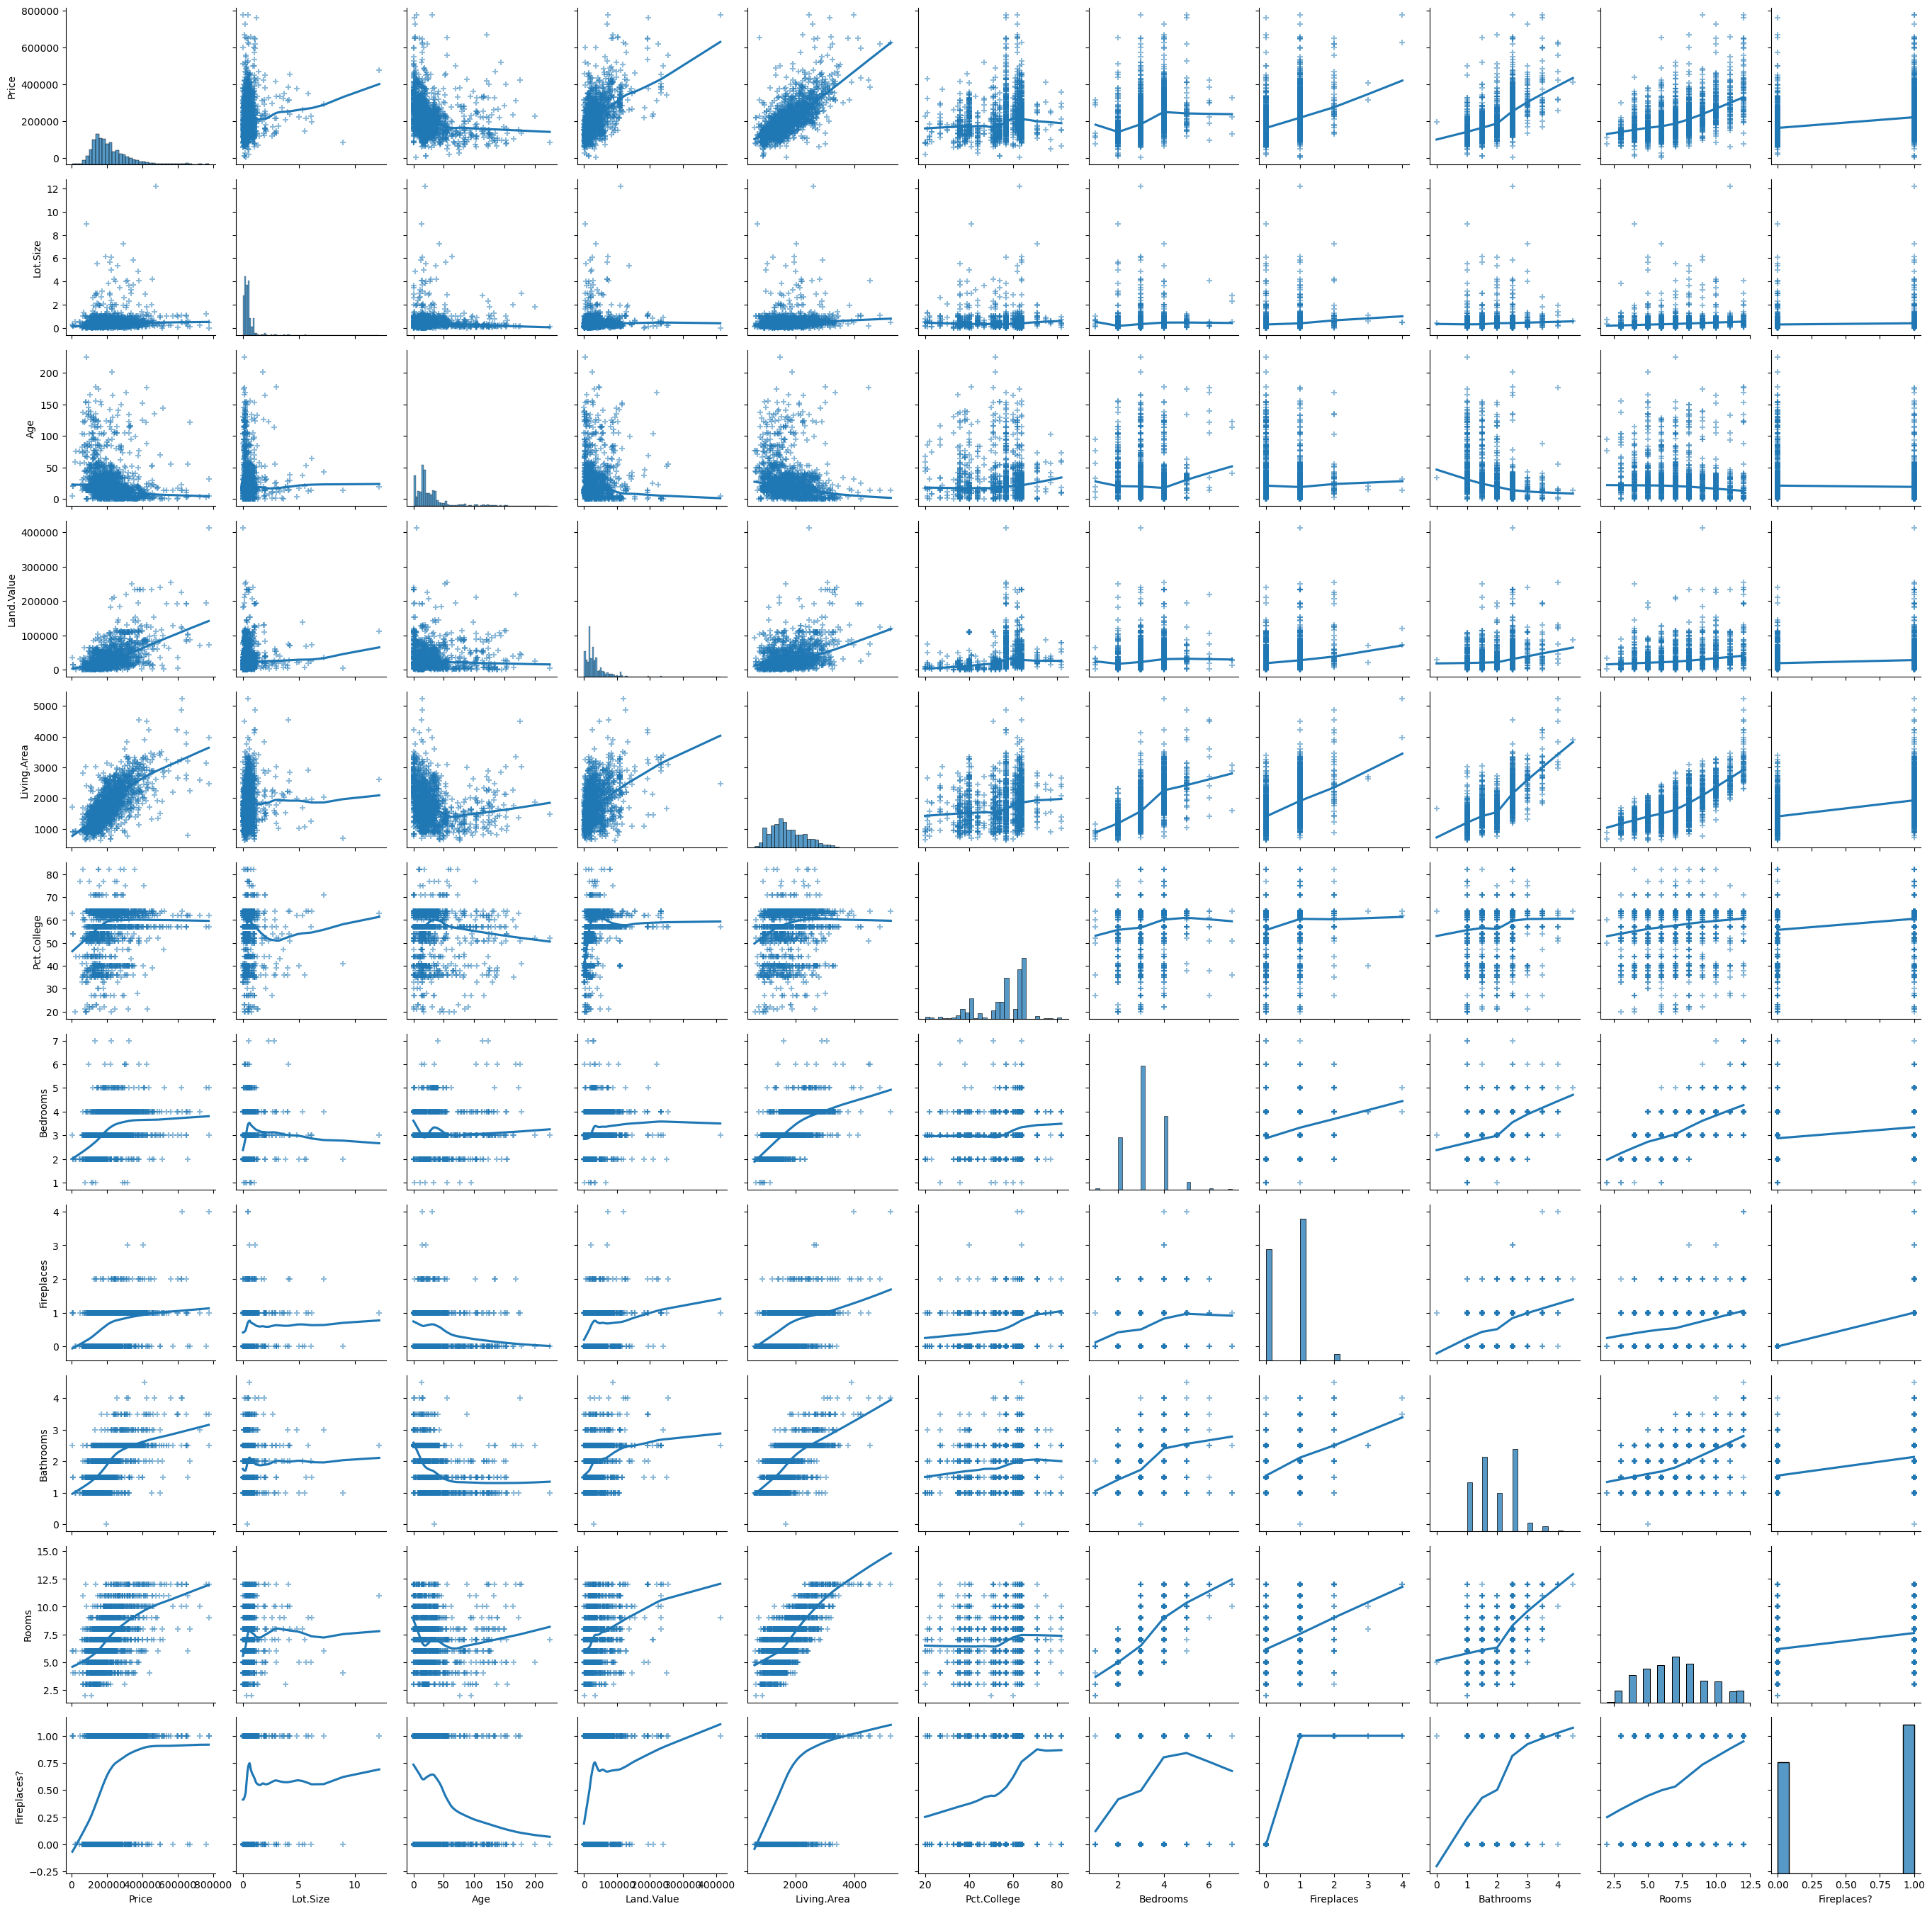

In [60]:
g = sns.PairGrid(homes.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )

**Summary:**
Nonlinear patterns are noticable in several relationships. Price increases sharply with living area and land value before flattening out at higher values, suggesting diminishing returns. Prices declines with age most noticeable among newer homes. Discrete variables show gradual increases in price rather than continuous trends, strengthening their categorical structure.